# Challenge: What test to use

In [1]:
# MENTOR QUESTIONS
# Non-normal distrib, 2 indep. groups tests:
# Mann-Whitney U

# Non-normal distrib, 2+ indep. groups tests:
# Mood's Median, Kruskal-Wallis

# Non-normal distrib, 2 dep. groups tests:
# Wilcoxon

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, ttest_ind, f_oneway, mannwhitneyu, median_test, kruskal

df = pd.read_csv('./data/ess.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


For each question, explain why you chose the approach you did. In this dataset, the same participants answered questions in 2012 and again 2014.

- __Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.__

    I conducted a T-test for paired samples, as the same group of test subjects answered the question twice (making the samples dependent) and their reported trust levels each time had a roughly normal distribution. I had a p-value of 0.9396, which means it is unlikely that people became less trusting from 2012 to 2014.

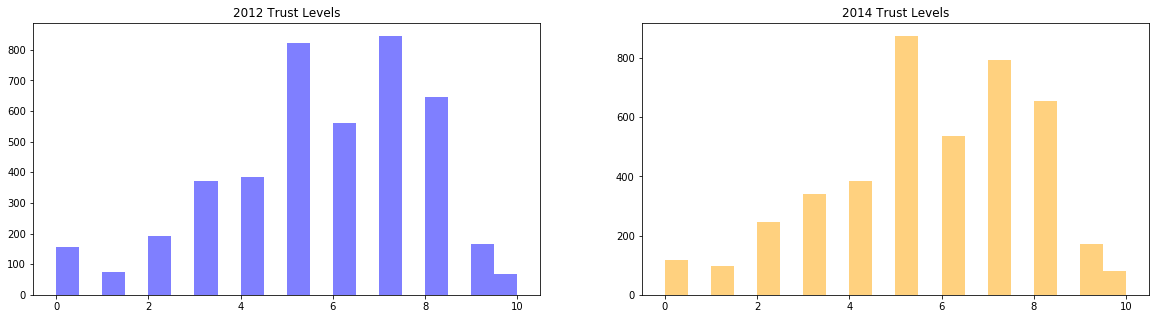

Ttest_relResult(statistic=0.07575168043269885, pvalue=0.9396201977999982)

In [3]:
yr_12_trust = df[df['year'] == 6]['ppltrst']
yr_14_trust = df[df['year'] == 7]['ppltrst']

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.hist(yr_12_trust.dropna(), bins=20, alpha=0.5, color='blue')
plt.title('2012 Trust Levels')

plt.subplot(1, 2, 2)
plt.hist(yr_14_trust.dropna(), bins=20, alpha=0.5, color='orange')
plt.title('2014 Trust Levels')

plt.show()

ttest_rel(yr_12_trust, yr_14_trust, nan_policy='omit')

- __Did people become happier from 2012 to 2014? Compute results for each country in the sample.__

    Again, I conducted a T-test for paired samples for each country, as the same group of test subjects answered the question twice (once in 2012, and again in 2014) and their happiness levels are roughly normally distributed. It seemed that people in most countries did not become noticeably happier from 2012 to 2014. Only NO did show a significant difference in happiness between the 2 years (happier in 2012 than 2014).

CH – stat: -0.32; p-val: 0.75
CZ – stat: -1.46; p-val: 0.15
DE – stat: -0.81; p-val: 0.43
ES – stat: 1.61; p-val: 0.11
NO – stat: 4.29; p-val: 0.0
SE – stat: -0.56; p-val: 0.58


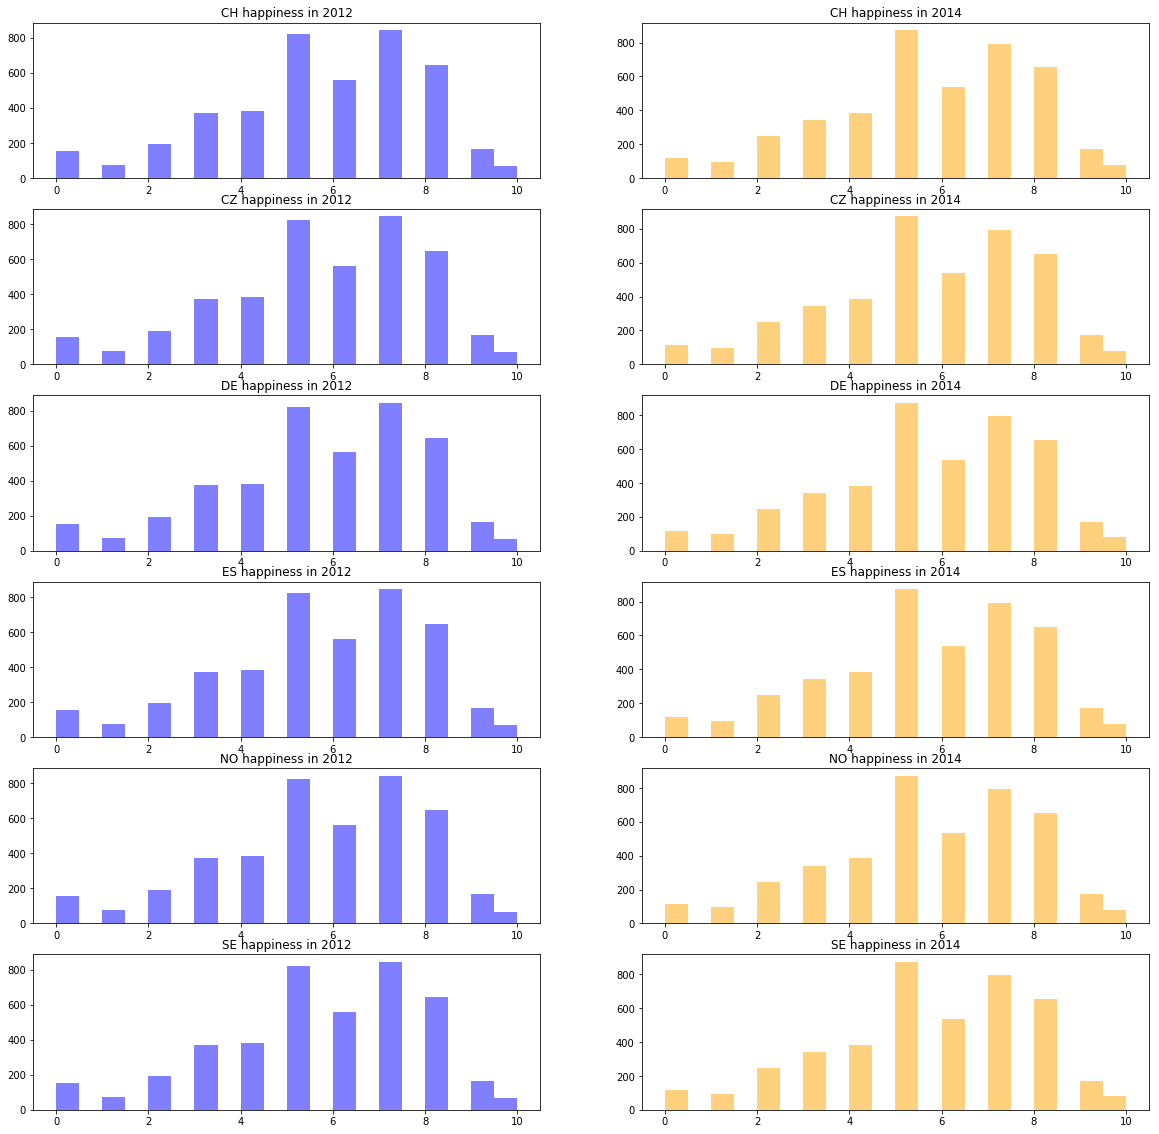

In [4]:
plt.figure(figsize=(20, 20))

for idx, cntry in enumerate(df['cntry'].unique()):
    yr_12_happy = df.query('year == 6 and cntry == "' + cntry + '"')['happy']
    yr_14_happy = df.query('year == 7 and cntry == "' + cntry + '"')['happy']
    
    plt.subplot(len(df['cntry'].unique()), 2, 2 * idx + 1)
    plt.hist(yr_12_trust.dropna(), bins=20, alpha=0.5, color='blue')
    plt.title(cntry + ' happiness in 2012')

    plt.subplot(len(df['cntry'].unique()), 2, 2 * idx + 2)
    plt.hist(yr_14_trust.dropna(), bins=20, alpha=0.5, color='orange')
    plt.title(cntry + ' happiness in 2014')
    
    ttest_res = ttest_rel(yr_12_happy, yr_14_happy, nan_policy='omit')
    print('{} – stat: {}; p-val: {}'.format(cntry, round(ttest_res.statistic, 2), round(ttest_res.pvalue, 2)))

- __Who reported watching more TV in 2012, men or women?__

    I used 3 different non-parametric tests (Mann-Whitney, Mood's Median, and Kruskal-Wallis) for this comparison, as men and women do not overlap (i.e. independent samples), but their TV consumption is not normally distributed. There is no significant difference in the number of hours watched by either gender.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


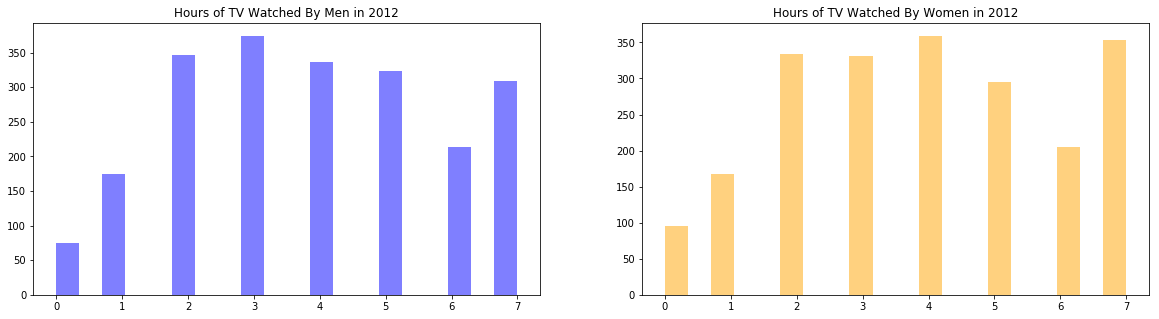

Mann-Whitney: MannwhitneyuResult(statistic=2271081.5, pvalue=0.22382598497660156)
Mood's Median: (0.10448797978115422, 0.7465089423999145, 4.0, array([[ 846,  853],
       [1305, 1287]]))
Kruskal-Wallis: KruskalResult(statistic=0.5766091020549451, pvalue=0.447644522500795)


In [5]:
yr_12_men_tv = df[df['year'] == 6][df['gndr'] == 1]['tvtot'].dropna()
yr_12_women_tv = df[df['year'] == 6][df['gndr'] == 2]['tvtot'].dropna()

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.hist(yr_12_men_tv, bins=20, alpha=0.5, color='blue')
plt.title('Hours of TV Watched By Men in 2012')

plt.subplot(1, 2, 2)
plt.hist(yr_12_women_tv, bins=20, alpha=0.5, color='orange')
plt.title('Hours of TV Watched By Women in 2012')

plt.show()

print('Mann-Whitney:', mannwhitneyu(yr_12_men_tv, yr_12_women_tv))
print("Mood's Median:", median_test(yr_12_men_tv, yr_12_women_tv))
print('Kruskal-Wallis:', kruskal(yr_12_men_tv, yr_12_women_tv))

- __Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?__

    I used a T-test for independent groups for this comparison, as people living with a partner and those living alone are completely separate and do not overlap. It shows that people with partners believe in other people's fairness significantly more than those who are single.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


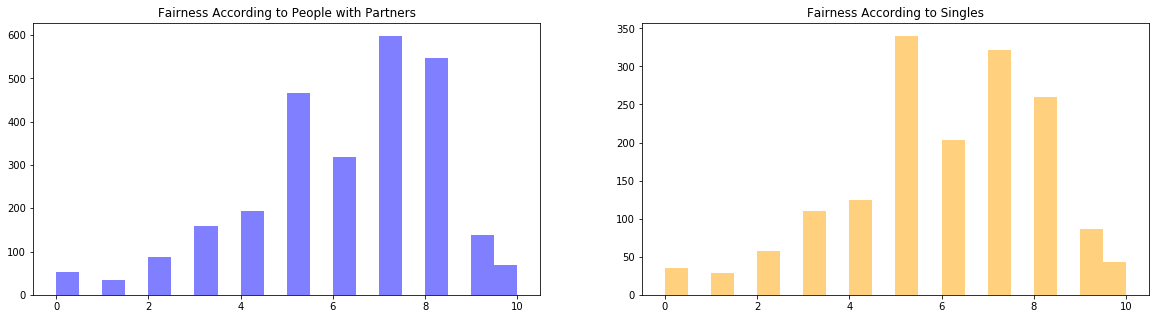

Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609876207)

In [6]:
df_copy = df.copy()
null_fairs = df_copy[df_copy['pplfair'].isnull()]

yr_12_partners_fairness = df_copy[df_copy['partner'] == 1][df_copy['year'] == 6]['pplfair']
yr_12_alones_fairness = df_copy[df_copy['partner'] == 2][df_copy['year'] == 6]['pplfair']

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.hist(yr_12_partners_fairness.dropna(), bins=20, alpha=0.5, color='blue')
plt.title('Fairness According to People with Partners')

plt.subplot(1, 2, 2)
plt.hist(yr_12_alones_fairness.dropna(), bins=20, alpha=0.5, color='orange')
plt.title('Fairness According to Singles')

plt.show()

ttest_ind(yr_12_partners_fairness, yr_12_alones_fairness, nan_policy='omit')

- __Pick 3 or 4 of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?__

    I used 2 non-parametric tests (Mood's Median, Kruskal-Wallis) for this problem, as I will be comparing 3+ countries whose citizens' answers are completely independent of each other, and whose social meeting numbers are not normally distributed. SE seems to be significantly different from both ES and NO – ES and NO do not differ significantly from each other.

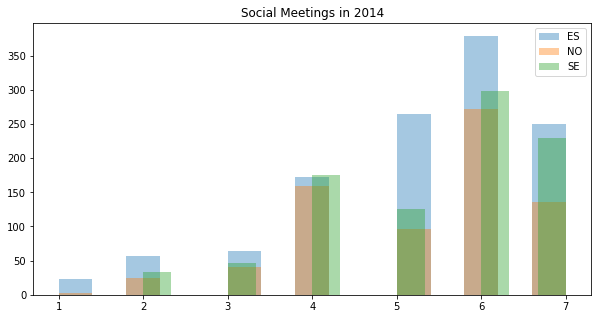

Mood's Median: (11.561242305930413, 0.0030867974392399964, 6.0, array([[250, 136, 229],
       [961, 595, 679]]))
Kruskal-Wallis: KruskalResult(statistic=6.904038519231737, pvalue=0.03168159837298754)


In [7]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['sclmeet'])

selected_countries = ['ES', 'NO', 'SE']
query_results = []

plt.figure(figsize=(10,5))

for idx, cntry in enumerate(selected_countries):
    yr_14_sclmeet = df_copy.query('year == 7 and cntry == "' + cntry + '"')['sclmeet']
    query_results.append(yr_14_sclmeet)
    
    plt.hist(yr_14_sclmeet.dropna(), bins=15, alpha=0.4, label=cntry)
    plt.legend()

plt.title('Social Meetings in 2014')
plt.show()

print("Mood's Median:", median_test(*query_results))
print('Kruskal-Wallis:', kruskal(*query_results))

In [8]:
def get_yr_14_sclmeet_for(cntry):
    return df_copy.query('year == 7 and cntry == "' + cntry + '"')['sclmeet']

for name, test in {'mann-whitney': mannwhitneyu, "mood's median": median_test, 'kruskal': kruskal}.items():
    for combo in [('ES', 'NO'), ('ES', 'SE'), ('NO', 'SE')]:
        print(name, 'test (', combo[0], 'vs.', combo[1], '):', test(get_yr_14_sclmeet_for(combo[0]), get_yr_14_sclmeet_for(combo[1])))

mann-whitney test ( ES vs. NO ): MannwhitneyuResult(statistic=441874.5, pvalue=0.47443309960851965)
mann-whitney test ( ES vs. SE ): MannwhitneyuResult(statistic=517268.0, pvalue=0.00818216038075548)
mann-whitney test ( NO vs. SE ): MannwhitneyuResult(statistic=312204.5, pvalue=0.016380772865283215)
mood's median test ( ES vs. NO ): (1.0659064492755896, 0.30187191598669527, 6.0, array([[250, 136],
       [961, 595]]))
mood's median test ( ES vs. SE ): (5.952530127496002, 0.014696178117458505, 6.0, array([[250, 229],
       [961, 679]]))
mood's median test ( NO vs. SE ): (9.860448283195055, 0.001688699530843686, 6.0, array([[136, 229],
       [595, 679]]))
kruskal test ( ES vs. NO ): KruskalResult(statistic=0.004118258500640619, pvalue=0.9488319512783521)
kruskal test ( ES vs. SE ): KruskalResult(statistic=5.763475949315309, pvalue=0.01636267063215786)
kruskal test ( NO vs. SE ): KruskalResult(statistic=4.558428749475355, pvalue=0.032757112714878724)


- __Pick 3 or 4 of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?__

I used a one-way ANOVA test for this problem, as I will be comparing 3+ countries whose citizens' answers are completely independent of each other, and whose social activities numbers are roughly normally distributed. It shows a significant difference between the three countries' frequency of participating in social activities. ES seems to be significantly different from both SE and NO – SE and NO do not differ significantly from each other.

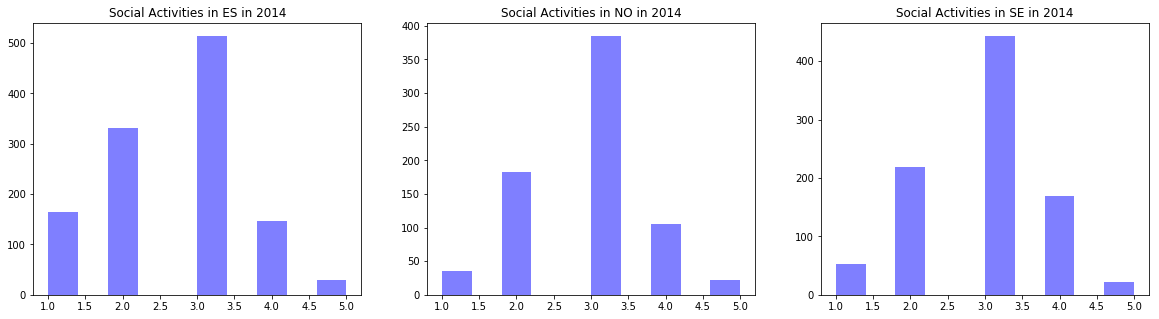

F_onewayResult(statistic=27.753885475253163, pvalue=1.1583945951240228e-12)

In [9]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['sclact'])

selected_countries = ['ES', 'NO', 'SE']
query_results = []

plt.figure(figsize=(20,5))

for idx, cntry in enumerate(selected_countries):
    yr_14_sclact = df_copy.query('year == 7 and cntry == "' + cntry + '"')['sclact']
    query_results.append(yr_14_sclact)
    
    plt.subplot(1, 3, idx + 1)
    plt.hist(yr_14_sclact.dropna(), bins=10, alpha=0.5, color='blue')
    plt.title('Social Activities in ' + cntry + ' in 2014')

plt.show()

f_oneway(*query_results)

In [10]:
def get_yr_14_sclact_for(cntry):
    return df_copy.query('year == 7 and cntry == "' + cntry + '"')['sclact']

print('ES vs. NO:', ttest_ind(get_yr_14_sclact_for('ES'), get_yr_14_sclact_for('NO')))
print('ES vs. SE:', ttest_ind(get_yr_14_sclact_for('ES'), get_yr_14_sclact_for('SE')))
print('NO vs. SE:', ttest_ind(get_yr_14_sclact_for('NO'), get_yr_14_sclact_for('SE')))

ES vs. NO: Ttest_indResult(statistic=-5.671149129663532, pvalue=1.6345881270312057e-08)
ES vs. SE: Ttest_indResult(statistic=-6.500257345866597, pvalue=1.000080729987386e-10)
NO vs. SE: Ttest_indResult(statistic=-0.4823216270234106, pvalue=0.6296421272017451)
